In [ ]:
import csv
import numpy as np
import cv2
import glob, copy, os
import xml.etree.ElementTree
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [95]:

class Reading(object):
    """__init__() functions as the class constructor"""
    def __init__(self, xmin=None, ymin=None, xmax=None, ymax=None, typ=None, name=None):
        """self.difficult = difficult
        self.truncated = truncated"""
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.typ = typ
        self.name = name

docs = sorted(glob.glob('BCCD/Annotations/' + '*.xml'))      

list_reading_arr = []
with open('labels.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    label_arr = []
    counter = 0
    for row in csv_reader:
        if counter != 0 and row[2] != "":
            label_arr.append([row[1], row[2]])
        #if :
        #   label_arr.append()
        counter += 1

index = 0
for i in range(len(docs)):
    label_this='B'
    #tree = xml.etree.ElementTree.parse('//dataset-master//Annotations//BloodImage_00000.xml')
    #print(doc + " " + label_arr[index][1])
    if(int(label_arr[index][0]) == int(docs[i][-9:-4])):
        label_this = label_arr[index][1][0]
    
    else:
        if(int(label_arr[index-1][0]) == int(docs[i][-9:-4])):
            print('-1')
            print(docs[i][-9:-4])
            print(label_this)
            index += -1
            i+=-1
            label_this = label_arr[index][1][0]
        if(int(label_arr[index+1][0]) == int(docs[i][-9:-4])):
            print('+1')
            print(docs[i][-9:-4])
            print(label_this)
            label_this = label_arr[index+1][1][0]
            #i+=1
            index += 1
    
    if(label_this == 'B'):
        index += 1
        #i+=1
        print(docs[i])
        #docs.remove(doc)
        continue
    if(label_this == ''):
        index += 1
        #i+=1
        print(docs[i])
        #docs.remove(doc)
        continue
    """"""   
    tree = xml.etree.ElementTree.parse(docs[i])
    root = tree.getroot()
    len_data = int(len(tree.findall('.//object//'))/9)
    #list_reading = [Reading() for i in range(len_data)]
    read = Reading()
    #print(doc)
   
            #continue
    #print(doc + label_this)
    count = 0
    #print("Print out the attrib of the root:\n")
    #list_reading[index_of_reading].typ = label_this
    #list_reading[index_of_reading].name = docs[i]
    read.typ = label_this
    read.name = docs[i]
    for objs in tree.findall('.//object//'):
        index_of_reading = int(count/9)
        #if(list_reading[index_of_reading])
        """if count%9 == 2:
            list_reading[index_of_reading].truncated = int(objs.text)
        if count%9 == 3:
            list_reading[index_of_reading].difficult = int(objs.text)"""
        #print(objs.text)
        
        if count%9 == 0:
            if objs.text != "WBC":
                #print("NO WBC")
                continue
        if count%9 == 5:
            #list_reading[index_of_reading].xmin = int(objs.text)
            read.xmin = int(objs.text)
        if count%9 == 6:
            #list_reading[index_of_reading].ymin = int(objs.text)
            read.ymin = int(objs.text)
        if count%9 == 7:
            #list_reading[index_of_reading].xmax = int(objs.text)
            read.xmax = int(objs.text)
        if count%9 == 8:
            #list_reading[index_of_reading].ymax = int(objs.text)
            read.ymax = int(objs.text)
             
        
        count+=1
    
    #print(docs[i] + label_this)
    list_reading_arr.append(read)
    for j in list_reading_arr:
        if j.xmax == j.xmin or j.ymax == j.ymin:
            #print(doc)
            list_reading_arr.remove(j)
        #print("cordinates:",i.xmin,i.ymin,i.xmax,i.ymax)
    index += 1
    
    
#print(list_reading_arr[0][0].xmin)


def crop_and_resize(img, read, size):
    w, h = size
    
    img_arr =[]
    xmin, ymin, xmax, ymax = (read.xmin,read.ymin,read.xmax,read.ymax)
    #print([xmin, ymin, xmax, ymax])
    img_crop = img[ymin:ymax,xmin:xmax]
    img_resized = cv2.resize(img_crop,(w, h), interpolation = cv2.INTER_CUBIC)
    img_arr.append(img_resized)

    return img_arr

def label_generator(read):
    if(read=='N'):
        return 0
    if(read=='M'):
        return 1
    if(read=='L'):
        return 2
    if(read=='E'):
        return 3
    
    

BCCD/Annotations/BloodImage_00008.xml
+1
00097
B
BCCD/Annotations/BloodImage_00117.xml
BCCD/Annotations/BloodImage_00132.xml
BCCD/Annotations/BloodImage_00171.xml
+1
00281
B
+1
00330
B


In [96]:
def recenter_regularize(X):
    print(np.mean(X,axis=1))
    X_mean = np.mean(X, axis = 1)[np.newaxis]
    X_centered = X - X_mean.T
    X_norm = np.linalg.norm(X_centered, axis = 1)[np.newaxis]
    X_normalized = X_centered/X_norm.T
    return X_normalized



path = 'BCCD/JPEGImages/'
#images = sorted(glob.glob(path + '*.jpg'))
WBC_arr_b = []; WBC_arr_g = []; WBC_arr_r = []; WBC_arr_gray = []
label_arr = []
#read images and make each into an array
for i in range(len(list_reading_arr)):
    img = path + os.path.split(list_reading_arr[i].name)[1][:-4] + '.jpg'
    #print(img)
    WBC_this = cv2.imread(img)
    WBC_this_arr = crop_and_resize(WBC_this, list_reading_arr[i], (60,60))
    WBC_b = WBC_this_arr[0][:, :, 0]
    WBC_g = WBC_this_arr[0][:, :, 1]
    WBC_r = WBC_this_arr[0][:, :, 2]
    WBC_gray = cv2.cvtColor(WBC_this_arr[0], cv2.COLOR_BGR2GRAY)
    

    label = label_generator(list_reading_arr[i].typ)
    #print(label)

    WBC_b, WBC_g, WBC_r, WBC_gray = np.reshape(WBC_b, -1), np.reshape(WBC_g, -1), np.reshape(WBC_r, -1), np.reshape(WBC_gray, -1)
    
    
    WBC_arr_b.append(WBC_b)
    WBC_arr_g.append(WBC_g)
    WBC_arr_r.append(WBC_r)
    WBC_arr_gray.append(WBC_gray)
    label_arr.append(label)
        
        
    i+=1
    if(i==len(list_reading_arr)):
        break

WBC_arr_b, WBC_arr_g, WBC_arr_r, WBC_arr_gray = (np.asarray(WBC_arr_b).T, np.asarray(WBC_arr_g).T, 
                                                 np.asarray(WBC_arr_r).T, np.asarray(WBC_arr_gray).T)
WBC_normalized_b = recenter_regularize(WBC_arr_b)
WBC_normalized_g= recenter_regularize(WBC_arr_g)
WBC_normalized_r=recenter_regularize(WBC_arr_r)
WBC_normalized_gray = recenter_regularize(WBC_arr_gray)

"""RBC_mean = np.mean(RBC_arr, axis = 1)[np.newaxis]
RBC_centered = RBC_arr - RBC_mean.T
RBC_norm = np.linalg.norm(RBC_centered, axis = 1)[np.newaxis]
RBC_normalized = RBC_centered/RBC_norm.T"""
U, S, V = np.linalg.svd(WBC_normalized_gray)

S_total = np.linalg.norm(S)**2
S_incr = 0
k = 0
for s in S:
    S_incr += s**2
    if(S_incr >= 0.95*S_total):
        break
    k += 1                                                                          






[178.08169014 178.72112676 179.49859155 ... 191.12676056 190.71549296
 190.49859155]
[175.9971831  177.21690141 178.31267606 ... 192.18309859 192.29014085
 192.14366197]
[186.17746479 186.86197183 187.3943662  ... 197.74084507 197.90985915
 197.9915493 ]
[179.28169014 180.27042254 181.14929577 ... 193.72957746 193.8028169
 193.72394366]


In [99]:
print(np.linalg.norm(WBC_normalized_gray[0]))

0.9999999999999998


In [100]:
print(os.path.split(list_reading_arr[0].name)[1][:-4] + '.jpg')

BloodImage_00000.jpg


In [101]:
print(len(S))

355


In [102]:
pca = PCA(n_components = 10)
pca.fit(WBC_normalized_gray.T)
print(pca.explained_variance_ratio_)
print(pca.components_)


[0.18825701 0.10617521 0.08053127 0.0722316  0.03747916 0.0358885
 0.03304153 0.02217198 0.02036195 0.01901742]
[[-0.00747208 -0.0071579  -0.0069707  ... -0.00587169 -0.00641052
  -0.00701876]
 [-0.01457314 -0.01581686 -0.01680746 ... -0.01410303 -0.01372912
  -0.01334199]
 [ 0.01519363  0.01492924  0.01468053 ... -0.01372112 -0.01309823
  -0.01255929]
 ...
 [ 0.0055215   0.0058045   0.00738759 ... -0.0131397  -0.01297834
  -0.01390181]
 [-0.0380132  -0.03927912 -0.04002912 ...  0.0403538   0.03810262
   0.03713563]
 [-0.00323477 -0.00124402  0.00025518 ...  0.01627334  0.01979542
   0.0207629 ]]


In [103]:
#Principle components
U_k = []
for i in range(k):
    U_k.append(U[:, i])
    
U_k = np.asarray(U_k)   
WBC_tilta_gray = []
for WBC in WBC_normalized_gray.T:
    WBC_tilta_gray.append(list(map(lambda x:np.inner(x, WBC), U_k.tolist())))
    



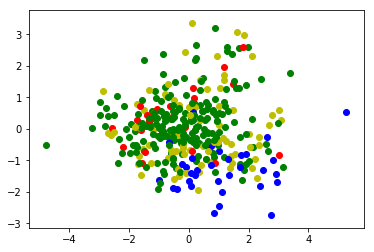

In [104]:
U_skPCA = pca.components_

U_skPCA = np.asarray(U_skPCA)
WBC_tilta_gray_sk = []

for WBC in WBC_normalized_gray.T:
    WBC_tilta_gray_sk.append(list(map(lambda x:np.inner(x, WBC), U_skPCA)))
    
fig = plt.figure()
ax = fig.add_subplot(111)
WBC_tilta_gray_sk = np.asarray(WBC_tilta_gray_sk)
counter = 0
for i in range(len(WBC_tilta_gray_sk)):
    if(label_arr[i] == 0):
        c = 'g'
    if(label_arr[i] == 1):
        c = 'r'
    if(label_arr[i] == 2):
        counter += 1
        c = 'b'
    if(label_arr[i] == 3):
        c = 'y'
        
    ax.scatter(WBC_tilta_gray_sk[i][0], WBC_tilta_gray_sk[i][1], color = c)

plt.show()

In [105]:
np.asarray(WBC_tilta_gray_sk).shape

(355, 10)

In [106]:
U_k.shape

(109, 3600)

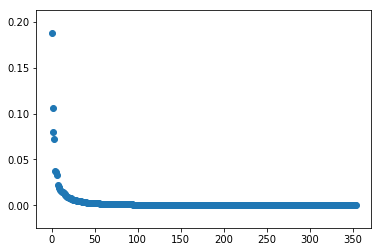

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(len(S)), S**2/S_total)
plt.show()

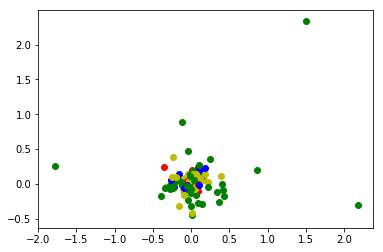

In [109]:
#RBC_tilta_list = copy.deepcopy(RBC_tilta)
WBC_tilta_gray = np.asarray(WBC_tilta_gray).T
WBC_tilta_gray_12 = WBC_tilta_gray[:2]



fig = plt.figure()
ax = fig.add_subplot(111)
WBC_tilta_gray_12 = WBC_tilta_gray_12.T
counter = 0
for i in range(len(WBC_tilta_gray_12)):
    if(label_arr[i] == 0):
        c = 'g'
    if(label_arr[i] == 1):
        c = 'r'
    if(label_arr[i] == 2):
        counter += 1
        c = 'b'
    if(label_arr[i] == 3):
        c = 'y'
        
    ax.scatter(WBC_tilta_gray_12[i][0], WBC_tilta_gray_12[i][1], color = c)

plt.show()


In [111]:

# KNN classifier
def KNN_classif(Feature, img_Rep, trainLabels, k):
    training_labels = np.asarray(trainLabels)
    #compute the distance of the input N-dim Feature to every other point
    #
    distance=[]
    for img in img_Rep.T:
        distance.append(np.linalg.norm(img - Feature))
    
    distance = np.array(distance)
    distance_k = distance.argsort()[:k]
    neighbors = training_labels[distance_k].tolist()
    #print(neighbors)
    #x = np.sum(training_labels[distance_k])
    #return x
    
    return max(neighbors, key=neighbors.count)

# k-fold Cross Validation 
'''cross_validation(samples, labels, k:int):
    m,n = np.shape(samples)
    k_fold = np.row_stack((samples, labels))
'''    


WBC_tilta_gray_train = WBC_tilta_gray[:300, :].T
WBC_tilta_gray_test = WBC_tilta_gray[300:, :].T
cls = []

#for k in range()
for i in range(len(WBC_tilta_gray_test[0])):
    
    cls.append(KNN_classif(WBC_tilta_gray_test[:, i], WBC_tilta_gray_train , label_arr, 19))

cls = np.asarray(cls)
print(cls-np.asarray(label_arr[300:]))
#print(np.sum(cls - np.asarray(label_arr[3000:])))
RBC_tilta = np.asarray(RBC_tilta_list).T





[ 0  0  0  0 -3 -3  0  0  1  0 -3  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -3  0  0  0  0  3 -3  0  0  0 -3  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  3  0  0 -3]


NameError: name 'RBC_tilta_list' is not defined

In [ ]:
WBC_tilta_gray.shape

In [ ]:
print(np.sum(abs(cls - np.asarray(label_arr[3000:]))))

In [ ]:
print(cls)
print(label_arr[3000])
print([0 for i in range(5)])

In [ ]:
print(RBC_tilta.shape)
print(RBC_normalized.shape)

In [ ]:
print(RBC_normalized.shape)
np.argmax(label_arr)
label_arr[2]

In [ ]:
RBC_norm = np.linalg.norm(RBC_centered, axis = 1)[np.newaxis]
RBC_normalized = RBC_centered/RBC_norm.T

In [ ]:
len(RBC_arr)
A = [[[1,2,3],[2,3,2],[3,4,3]],[[11,12,13],[12,13,12],[13,14,13]]]
A_vec = np.reshape(A, -1)  
B_vec = np.flip(A_vec)
A_centered = np.mean(np.asarray([A_vec, B_vec]), axis = 0)
print(A_centered)

In [ ]:
print(RBC_arr[0])

In [ ]:
img = RBC_arr[0]

def crop_and_resize(img, bound, size):
    
    xmin, ymin, xmax, ymax = bound
    w, h = size
    
    img_crop = img[ymin:ymax,xmin:xmax]
    #cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    img_resized = cv2.resize(img_crop,(w, h), interpolation = cv2.INTER_CUBIC)
    return img_resized
    
img_resized = crop_and_resize(img, (100, 50, 250, 200), (100, 100))
cv2.imshow('img', img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Random Forest approach by Chaoji Zuo

In [423]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score

In [312]:
labels=[]
for i in list_reading_arr:
      labels.append(i.typ)
X_all=WBC_normalized_gray.T
y_all=labels
print("value counts of labels:\n",pd.Series(y_all).value_counts())

value counts of labels:
 N    213
E     87
L     34
M     21
dtype: int64


### first try of whole data

like the regression problem, I applied the random forest on the whole data and test on it. It got a pretty great 
result

precision score : 0.9915492957746479
accuracy : 0.9915492957746479
Normalized confusion matrix


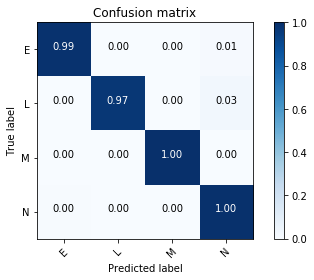

In [426]:
RFClassifier=RandomForestClassifier()
RFClassifier.fit(X_all,y_all)
pred_y=RFClassifier.predict(X_all)
print('precision score :',precision_score(y_pred=pred_y,y_true=y_all,average='micro'))
print('accuracy :',accuracy_score(y_pred=pred_y,y_true=y_all))
con_mat=confusion_matrix(pred_y,y_all)
plot_confusion_matrix(con_mat,classes=['E','L','M','N'],normalize=True)


In [308]:
raw_data=WBC_normalized_gray.T
raw_amount=np.array(labels)
import random
folds_data=[]
folds_labels=[]
def randomData(num):
    indexs=list(range(num))
    each=int(num/5)
    random.shuffle(indexs)
    data1=raw_data[indexs[:each]]
    y1=raw_amount[indexs[:each]]
    
    data2=raw_data[indexs[each:each*2]]
    y2=raw_amount[indexs[each:each*2]]
    
    data3=raw_data[indexs[each*2:each*3]]
    y3=raw_amount[indexs[each*2:each*3]]
    
    data4=raw_data[indexs[each*3:each*4]]
    y4=raw_amount[indexs[each*3:each*4]]
    
    data5=raw_data[indexs[each*4:each*5]]
    y5=raw_amount[indexs[each*4:each*5]]
    
    
    folds_data=[data1,data2,data3,data4,data5]
    folds_labels=[y1,y2,y3,y4,y5]
    return folds_data,folds_labels


        
fold_number=np.array([0,1,2,3,4])
folds_data,folds_labels=randomData(355)

In [313]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Cross-Validation on whole data

Then I split data into test set and training set and use cross validation to see its generalization ability

prediction error of fold  0  :  0.7323943661971831
Normalized confusion matrix


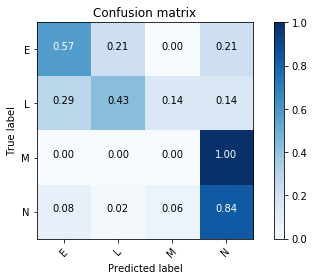

prediction error of fold  1  :  0.6056338028169014
Normalized confusion matrix


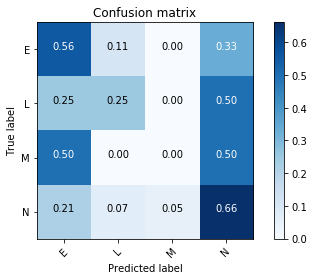

prediction error of fold  2  :  0.6619718309859155
Normalized confusion matrix


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


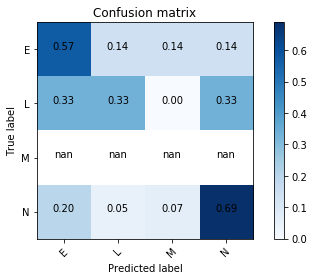

prediction error of fold  3  :  0.6338028169014085
Normalized confusion matrix


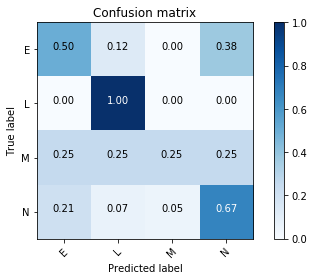

prediction error of fold  4  :  0.6197183098591549
Normalized confusion matrix


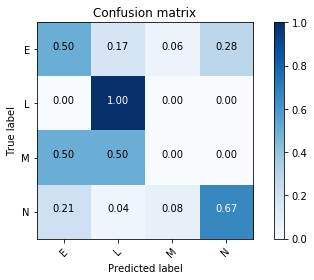

In [428]:
precisionArr=[]
recallArr=[]
for i in range(5):
    test_data=folds_data[i]
    test_labels=folds_labels[i]
    train_number=np.delete(fold_number,i,axis=0)
    train_data=np.concatenate((folds_data[train_number[0]],folds_data[train_number[1]],folds_data[train_number[2]],folds_data[train_number[3]]))
    train_labels=np.concatenate((folds_labels[train_number[0]],folds_labels[train_number[1]],folds_labels[train_number[2]],folds_labels[train_number[3]]))

    RFClassifier=RandomForestClassifier()
    RFClassifier.fit(train_data,train_labels)
    predictY=RFClassifier.predict(test_data)
    plt.title("Measured versus Predicted")
    #plt.scatter(test_labels,list(predictY),c='b')
    #plt.plot(test_labels,test_labels,c='r')
    plt.xlabel("real value")
    plt.ylabel("predict value")
    #print(myLS.getWLS())
    con_mat=confusion_matrix(predictY,test_labels)
    score=precision_score(y_pred=predictY,y_true=test_labels,average='micro')
    rec=accuracy_score(y_pred=predictY,y_true=test_labels)
    print("prediction error of fold ",i," : ",precision_score(y_pred=predictY,y_true=test_labels,average='micro'))
    plot_confusion_matrix(con_mat,classes=['E','L','M','N'],normalize=True)
    plt.show()
    precisionArr.append(score)
    recallArr.append(rec)

In [430]:
print("average precision:",np.mean(precisionArr))


average precision: 0.6507042253521127


As you can see, the generalization ability of this model is really bad

But it maybe because we just have a small size of dataset

In [319]:
X_train=X_all[:300]
y_train=y_all[:300]
X_test=X_all[300:]
y_test=y_all[300:]

### parameters optimazation

In [418]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
#tuned_parameters = [{'n_estimators':[1,20,200],'max_depth':[8,10,30]}]
tuned_parameters = [{'max_features':['sqrt','auto','log2'],'n_estimators':[1,20,100],'max_depth':[10,30,60]}]

clf = GridSearchCV(estimator=rfc,param_grid=tuned_parameters, cv=5, n_jobs=1)

clf.fit(X_train, y_train)
print('Best parameters:')
print(clf.best_params_)

Best parameters:
{'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}


In [392]:
'''RFClassifier=RandomForestClassifier(min_samples_leaf=3,n_estimators=200)
RFClassifier.fit(X_train,y_train)
pred_y=RFClassifier.predict(X_test)
print("prediction error :",precision_score(y_pred=pred_y,y_true=y_test,average='micro'))
con_mat=confusion_matrix(predictY,test_labels)
plot_confusion_matrix(con_mat,classes=['E','L','M','N'],normalize=True)
'''
h=1

prediction error of fold  0  :  0.704225352112676
Normalized confusion matrix


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


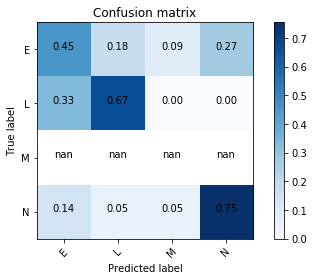

prediction error of fold  1  :  0.6619718309859155
Normalized confusion matrix


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


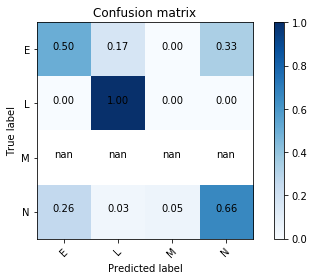

prediction error of fold  2  :  0.676056338028169
Normalized confusion matrix


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


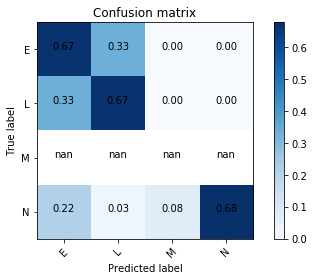

prediction error of fold  3  :  0.6338028169014085
Normalized confusion matrix


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


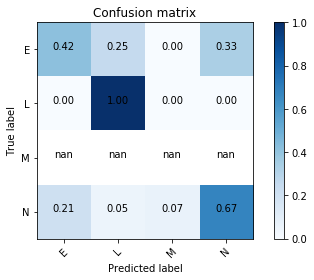

prediction error of fold  4  :  0.6056338028169014
Normalized confusion matrix


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


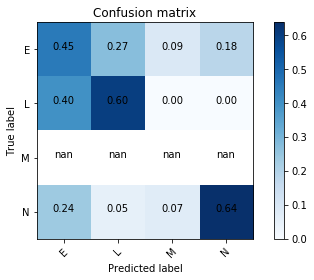

In [419]:
for i in range(5):
    test_data=folds_data[i]
    test_labels=folds_labels[i]
    train_number=np.delete(fold_number,i,axis=0)
    train_data=np.concatenate((folds_data[train_number[0]],folds_data[train_number[1]],folds_data[train_number[2]],folds_data[train_number[3]]))
    train_labels=np.concatenate((folds_labels[train_number[0]],folds_labels[train_number[1]],folds_labels[train_number[2]],folds_labels[train_number[3]]))

    RFClassifier=RandomForestClassifier(n_estimators=200,max_depth=30,max_features='auto')
    RFClassifier.fit(train_data,train_labels)
    predictY=RFClassifier.predict(test_data)
    plt.title("Measured versus Predicted")
    #plt.scatter(test_labels,list(predictY),c='b')
    #plt.plot(test_labels,test_labels,c='r')
    plt.xlabel("real value")
    plt.ylabel("predict value")
    #print(myLS.getWLS())
    con_mat=confusion_matrix(predictY,test_labels)
    

    score=precision_score(y_pred=predictY,y_true=test_labels,average='micro')

    print("prediction error of fold ",i," : ",precision_score(y_pred=predictY,y_true=test_labels,average='micro'))
    plot_confusion_matrix(con_mat,classes=['E','L','M','N'],normalize=True)
    plt.show()
    precisionArr.append(score)

In [420]:
print("average precision:",np.mean(precisionArr))

average precision: 0.6535211267605633


by training the best parameters, the output became better, but just improve a little

## Gaussian Naive Bayes Classifier by Changlin Jiang

### Discussion
The image-based dataset is likely to be iid,so naive bayes classifier may work.Implement gaussian naive bayes classifier to the dataset and use cross validation to check the accuracy:

### PCA with error<0.1 (k=59)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [27]:
U_k=U[:,:59]
WBC_gray_telda=np.mat(U_k.T)*np.mat(WBC_normalized_gray)

In [28]:
clf = GaussianNB()
data_gaussian=WBC_gray_telda.T
scores_gaussian = cross_val_score(clf, data_gaussian, label_arr, cv=5)
print("Gaussian naive bayes classifier:")
print("Cross validation scores=",scores_gaussian,",Mean accuragy=",np.mean(scores_gaussian))

Gaussian naive bayes classifier:
Cross validation scores= [0.53424658 0.5        0.63380282 0.57746479 0.5942029 ] ,Mean accuragy= 0.5679434159053987


In [29]:
training_data=WBC_gray_telda[:,:300]
training_label=label_arr[:300]
test_data=WBC_gray_telda[:,300:]
test_label=label_arr[300:]
clf.fit(training_data.T,training_label)
labels_derived=clf.predict(test_data.T)
error=0
for i in range(len(test_label)):
    if test_label[i]!=labels_derived[i]:
        error+=1
accuracy=1-error/len(test_label)
print("0-1 Loss=",error," Accuracy=",accuracy)

0-1 Loss= 13  Accuracy= 0.7678571428571428


In [30]:
conf_mat=confusion_matrix(test_label, labels_derived)
print(conf_mat)

[[40  3  0  4]
 [ 0  0  0  0]
 [ 1  0  0  1]
 [ 4  0  0  3]]


Confusion matrix, without normalization
[[40  3  0  4]
 [ 0  0  0  0]
 [ 1  0  0  1]
 [ 4  0  0  3]]


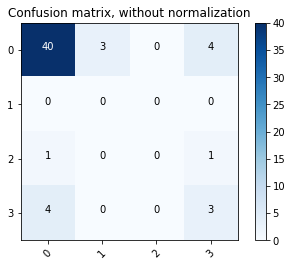

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
plt.figure()
plot_confusion_matrix(conf_mat, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')

The result shows that using gaussian naive bayes classifier maybe not a good idea.Possible reason is that the data maybe not gaussian distributed or non-linear model.